In [53]:
# IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns


In [54]:
# 1. Data cleaning
# 2. EDA
# 3. Data preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [55]:
data = pd.read_csv("spam.csv")

In [56]:
data[data['v1']=='spam']['v2']

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: v2, Length: 747, dtype: object

In [4]:
data.shape

(5572, 5)

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#check for missing values
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
# check for duplicated values
data.duplicated().sum()

403

In [9]:
# remove the duplicates

data = data.drop_duplicates(keep = 'first')

# DATA CLEANING

In [10]:
#In columns 2,3,4 most of the values are unknown so we can drop
data.drop(columns =["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace = True )

In [11]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data.rename(columns = {'v1':'target', 'v2': 'text'}, inplace = True)

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

In [14]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EXPLORATORY DATA ANALYSIS

In [15]:
data['target'].value_counts()
# 653 spams, 4516 not spam

0    4516
1     653
Name: target, dtype: int64

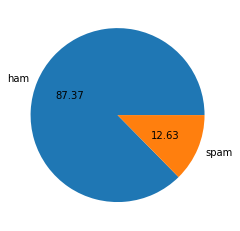

In [16]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

# imbalanced data

In [17]:
# To add columns
# 1. no.of characters
# 2. no.of words
# 3. no.of sentences

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\DHARINI
[nltk_data]     PARGUNAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
data['characters'] = data['text'].apply(len)
data['words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
data['sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
data.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
data.describe()

,target,characters,words,sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.923776,18.456375,1.962275
std,0.332253,58.174846,13.323322,1.433892
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [21]:
# ham messages
data[data['target']==0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# spam messages
data[data['target']==1][['characters','words','sentences']].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='characters', ylabel='Count'>

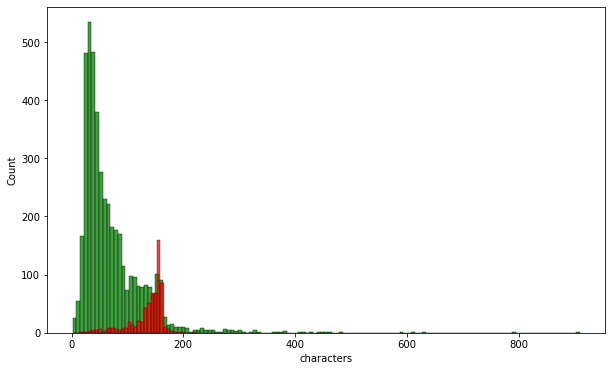

In [23]:
plt.figure(figsize= (10,6))
sns.histplot(data[data['target']==0]['characters'], color = 'green')
sns.histplot(data[data['target']==1]['characters'], color = 'red')


<AxesSubplot:xlabel='words', ylabel='Count'>

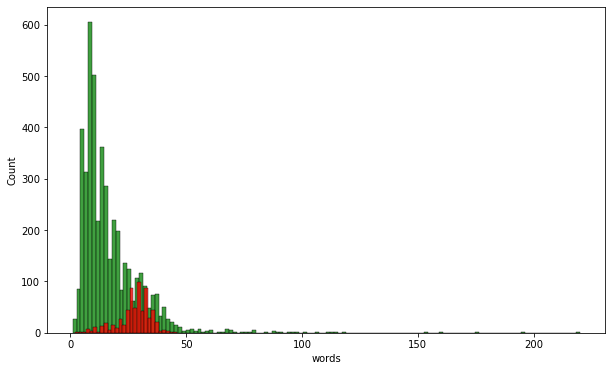

In [24]:
plt.figure(figsize= (10,6))
sns.histplot(data[data['target']==0]['words'], color = 'green')
sns.histplot(data[data['target']==1]['words'], color = 'red')


<AxesSubplot:xlabel='sentences', ylabel='Count'>

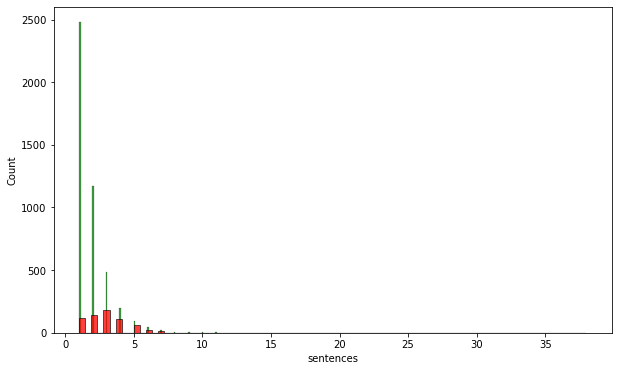

In [25]:
plt.figure(figsize= (10,6))
sns.histplot(data[data['target']==0]['sentences'], color = 'green')
sns.histplot(data[data['target']==1]['sentences'], color = 'red')


In [26]:
#correleation between features
data.corr()

,target,characters,words,sentences
target,1.000000,0.382785,0.263143,0.269132
characters,0.382785,1.000000,0.966087,0.626197
words,0.263143,0.966087,1.000000,0.680924
sentences,0.269132,0.626197,0.680924,1.000000


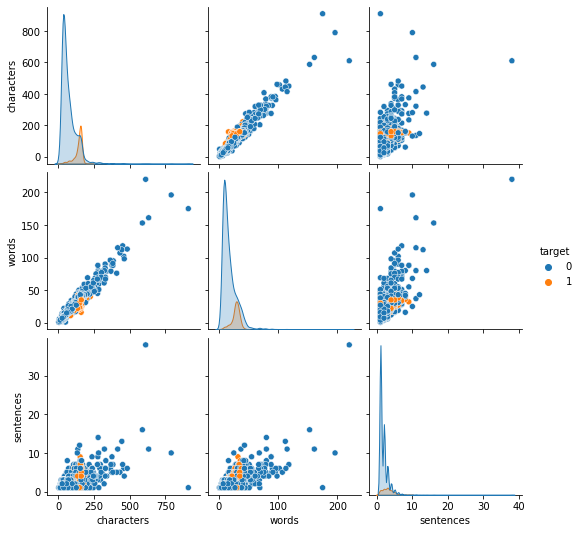

In [27]:
sns.pairplot(data, hue = 'target')

<AxesSubplot:>

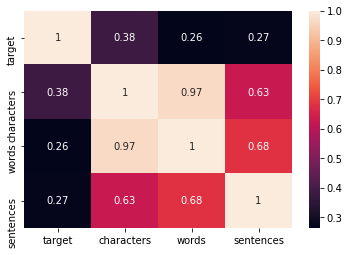

In [28]:
sns.heatmap(data.corr(), annot = True)

# DATA PREPROCESSING

In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


# stemming

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to C:\Users\DHARINI
[nltk_data]     PARGUNAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# convert into lower case,
# tokenization, 
# Removing special Characters
# Removing stop words and punctuation
# stemming

import string

def transform_text(text):
    y = []
    x = []
    z = []
    
    text = text.lower()  # removing lowercase
    text = nltk.word_tokenize(text)
    
    for i in text:  # removing special characters
        if i.isalnum():
            y.append(i)
        
        
    for i in y:  # removing stopwords and punctuations
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
        
    for i in x:  #stemming
        z.append(ps.stem(i))
    
    text = " ".join(z)
    
    return text

In [31]:
data["transformed_text"] = data["text"].apply(transform_text)

In [32]:
data.head()

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


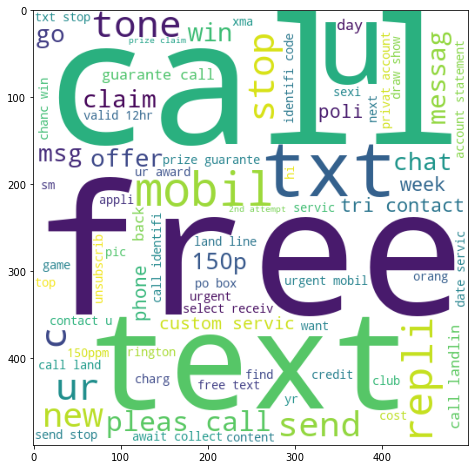

In [33]:
# word cloud

from wordcloud import WordCloud

plt.figure(figsize= (12,8))
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc =wc.generate(data[data['target'] == 1]["transformed_text"].str.cat(sep = " "))
plt.imshow(spam_wc)

In [34]:
# To get the top 30 frequently used spam words

spam_corpus = []
for msg in data[data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

C:\Users\DHARINI PARGUNAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


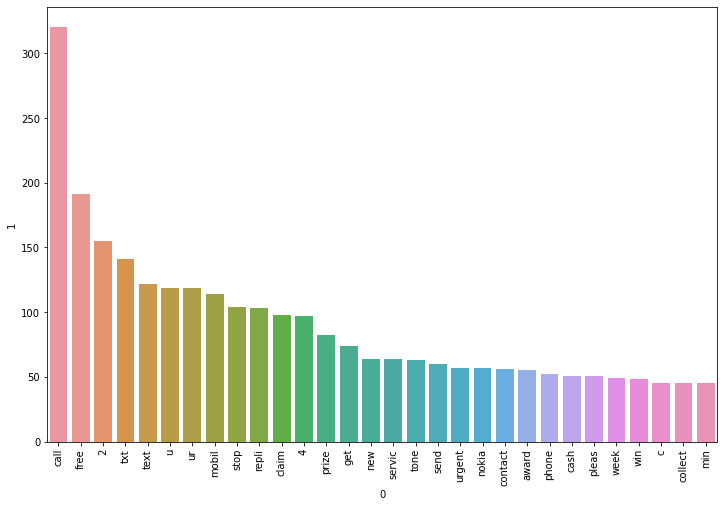

In [35]:
from collections import Counter

plt.figure(figsize= (12,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# MODEL BUIDLING


In [36]:
# 1. Countvectorizer (bag of words)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [37]:
X = cv.fit_transform(data['transformed_text']).toarray()
y = data['target'].values

print(X.shape, y.shape)

(5169, 6677) (5169,)


In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size = 0.2, random_state =2)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(4135, 6677) (1034, 6677) (4135,) (1034,)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Accuracy =0.8781431334622823
Precision Score =0.5267857142857143


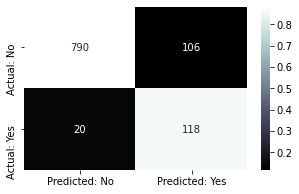

In [40]:
# Gaussian
gnb.fit(xtrain, ytrain)
y_pred_gnb = gnb.predict(xtest)

score = accuracy_score(ytest,y_pred_gnb)
ps = precision_score(ytest,y_pred_gnb)

print(f'Accuracy ={score}')
print(f'Precision Score ={ps}') # we need to reduce the false postives

label_preds = y_pred_gnb

cm = confusion_matrix(ytest,label_preds)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[5, 3])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm,
                    annot=cm,
                    fmt='g',
                    xticklabels=['Predicted: No','Predicted: Yes'],
                    yticklabels=['Actual: No','Actual: Yes'],
                    cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

Accuracy =0.965183752417795
Precision Score =0.84


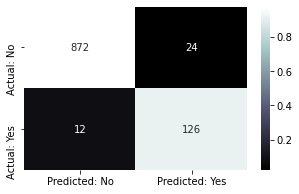

In [41]:
# multinomial
mnb.fit(xtrain, ytrain)
y_pred_mnb = mnb.predict(xtest)

score_mnb = accuracy_score(ytest,y_pred_mnb)
ps_mnb = precision_score(ytest,y_pred_mnb)

print(f'Accuracy ={score_mnb}')
print(f'Precision Score ={ps_mnb}') # we need to reduce the false postives
label_preds = y_pred_mnb

cm = confusion_matrix(ytest,label_preds)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[5, 3])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm,
                    annot=cm,
                    fmt='g',
                    xticklabels=['Predicted: No','Predicted: Yes'],
                    yticklabels=['Actual: No','Actual: Yes'],
                    cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

Accuracy =0.971953578336557
Precision Score =0.9823008849557522


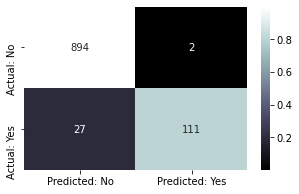

In [295]:
# bernoulli

bnb.fit(xtrain, ytrain)
y_pred_bnb = bnb.predict(xtest)

score_bnb = accuracy_score(ytest,y_pred_bnb)
ps_bnb = precision_score(ytest,y_pred_bnb)

print(f'Accuracy ={score_bnb}')
print(f'Precision Score ={ps_bnb}') # we need to reduce the false postives

label_preds = y_pred_bnb

cm = confusion_matrix(ytest,label_preds)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[5, 3])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm,
                    annot=cm,
                    fmt='g',
                    xticklabels=['Predicted: No','Predicted: Yes'],
                    yticklabels=['Actual: No','Actual: Yes'],
                    cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])


In [42]:
# TF -ID
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()

In [43]:
X = tfid.fit_transform(data['transformed_text']).toarray()
y = data['target'].values

print(X.shape, y.shape)

(5169, 6677) (5169,)


In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size = 0.2, random_state =2)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(4135, 6677) (1034, 6677) (4135,) (1034,)


Accuracy =0.874274661508704
Precision Score =0.518348623853211


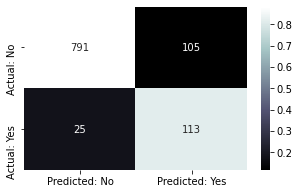

In [45]:
# Gaussian
gnb.fit(xtrain, ytrain)
y_pred_gnb = gnb.predict(xtest)

score = accuracy_score(ytest,y_pred_gnb)
ps = precision_score(ytest,y_pred_gnb)

print(f'Accuracy ={score}')
print(f'Precision Score ={ps}') # we need to reduce the false postives

label_preds = y_pred_gnb

cm = confusion_matrix(ytest,label_preds)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[5, 3])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm,
                    annot=cm,
                    fmt='g',
                    xticklabels=['Predicted: No','Predicted: Yes'],
                    yticklabels=['Actual: No','Actual: Yes'],
                    cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

Accuracy =0.9593810444874274
Precision Score =1.0


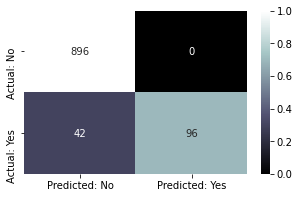

In [46]:
# multinomial
mnb.fit(xtrain, ytrain)
y_pred_mnb = mnb.predict(xtest)

score_mnb = accuracy_score(ytest,y_pred_mnb)
ps_mnb = precision_score(ytest,y_pred_mnb)

print(f'Accuracy ={score_mnb}')
print(f'Precision Score ={ps_mnb}') # we need to reduce the false postives
label_preds = y_pred_mnb

cm = confusion_matrix(ytest,label_preds)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[5, 3])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm,
                    annot=cm,
                    fmt='g',
                    xticklabels=['Predicted: No','Predicted: Yes'],
                    yticklabels=['Actual: No','Actual: Yes'],
                    cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

Accuracy =0.971953578336557
Precision Score =0.9823008849557522


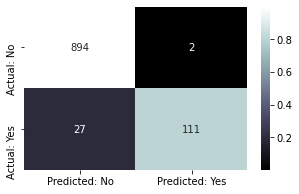

In [47]:
# bernoulli

bnb.fit(xtrain, ytrain)
y_pred_bnb = bnb.predict(xtest)

score_bnb = accuracy_score(ytest,y_pred_bnb)
ps_bnb = precision_score(ytest,y_pred_bnb)

print(f'Accuracy ={score_bnb}')
print(f'Precision Score ={ps_bnb}') # we need to reduce the false postives

label_preds = y_pred_bnb

cm = confusion_matrix(ytest,label_preds)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[5, 3])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm,
                    annot=cm,
                    fmt='g',
                    xticklabels=['Predicted: No','Predicted: Yes'],
                    yticklabels=['Actual: No','Actual: Yes'],
                    cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])


In [302]:
# BEST MODEL - MULITNOMINAL NB (TF-IDF)

In [305]:
import pickle
pickle.dump(tfid, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl', 'wb'))